In [26]:
from sklearn.datasets import load_wine
from scipy.stats import entropy
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the Iris dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [30]:
data.target.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [31]:
# Select a subset for binary classification (setosa vs non-setosa)
data = data[data['target'] < 2]
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


In [32]:
# Function to calculate entropy of a dataset
def calculate_entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return entropy(probabilities, base=2)

In [34]:
# Function to calculate information gain
def information_gain(data, split_feature, target_col='target'):
    total_entropy = calculate_entropy(data[target_col])
    values, counts = np.unique(data[split_feature], return_counts=True)
    weighted_entropy = sum(
        (counts[i] / len(data)) * calculate_entropy(data[data[split_feature] == values[i]][target_col]) for i in range(len(values))
    )
    return total_entropy - weighted_entropy


In [36]:
# Calculate information gain for each feature
info_gains = {feature: information_gain(data, feature) for feature in wine.feature_names}

In [44]:
selected_features = [key for key, value in info_gains.items() if value > 0.8]
print("Information Gain for each feature:")
print(info_gains)
print("Important features:", selected_features)

Information Gain for each feature:
{'alcohol': np.float64(0.9360773484014699), 'malic_acid': np.float64(0.7569469139568319), 'ash': np.float64(0.5092777833602081), 'alcalinity_of_ash': np.float64(0.5493345304665909), 'magnesium': np.float64(0.5794271331968524), 'total_phenols': np.float64(0.7314150184261896), 'flavanoids': np.float64(0.87657475229755), 'nonflavanoid_phenols': np.float64(0.2688620158714442), 'proanthocyanins': np.float64(0.7263763874103927), 'color_intensity': np.float64(0.8803457138027274), 'hue': np.float64(0.462603356214598), 'od280/od315_of_diluted_wines': np.float64(0.7602715563070596), 'proline': np.float64(0.9534978292206269)}
Important features: ['alcohol', 'flavanoids', 'color_intensity', 'proline']


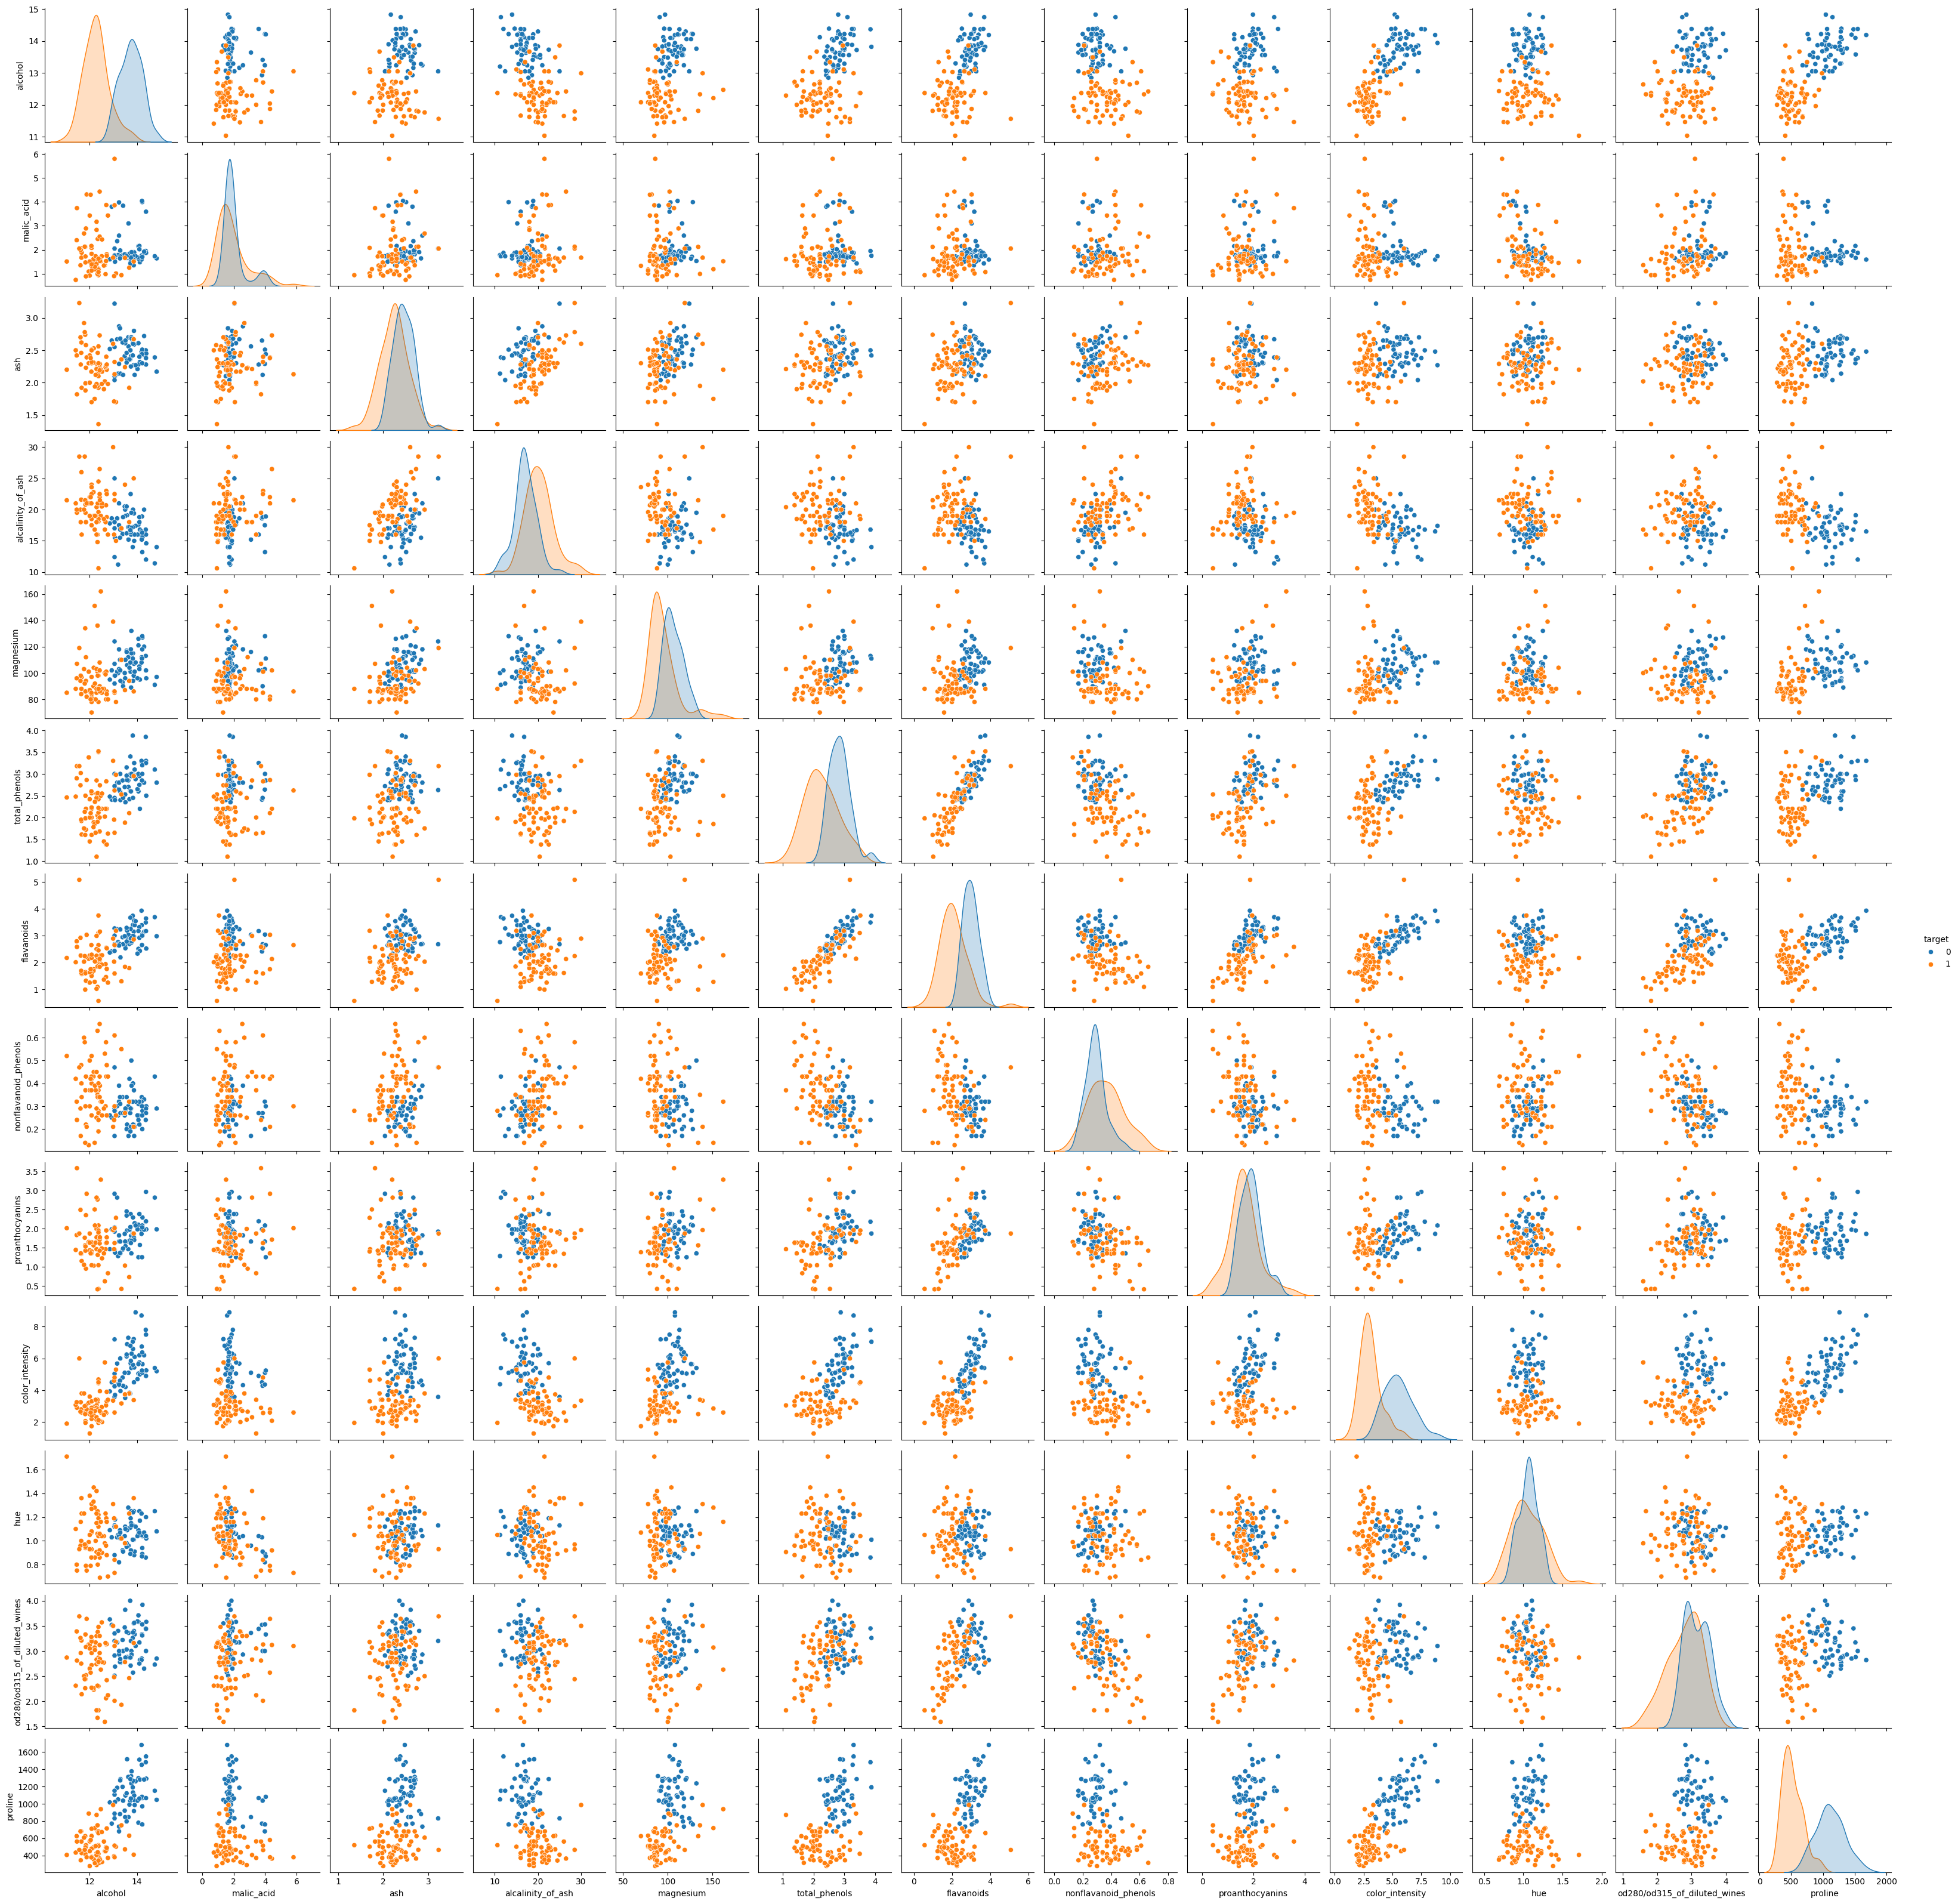

In [45]:
sns.pairplot(data, hue='target')

In [46]:
corr_matrix = data.corr()
print(corr_matrix)

                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.021014  0.190818   
malic_acid                    0.021014    1.000000  0.121625   
ash                           0.190818    0.121625  1.000000   
alcalinity_of_ash            -0.461771    0.141753  0.369136   
magnesium                     0.330544   -0.016360  0.306593   
total_phenols                 0.485061    0.030038  0.254490   
flavanoids                    0.543729    0.057852  0.377025   
nonflavanoid_phenols         -0.301314    0.055669  0.179396   
proanthocyanins               0.190869    0.136454  0.077778   
color_intensity               0.741935   -0.108202  0.253347   
hue                           0.026162   -0.408645  0.041164   
od280/od315_of_diluted_wines  0.290491    0.166457  0.214496   
proline                       0.756168   -0.107553  0.304101   
target                       -0.824399   -0.044302 -0.354548   

                              alcalinit

In [47]:
# Split the data into training and test sets of Selected features
X = data[selected_features]
y = data['target']
print(X, y)

     alcohol  flavanoids  color_intensity  proline
0      14.23        3.06             5.64   1065.0
1      13.20        2.76             4.38   1050.0
2      13.16        3.24             5.68   1185.0
3      14.37        3.49             7.80   1480.0
4      13.24        2.69             4.32    735.0
..       ...         ...              ...      ...
125    12.07        2.65             2.76    378.0
126    12.43        3.15             3.94    352.0
127    11.79        2.24             3.00    466.0
128    12.37        2.45             2.12    342.0
129    12.04        1.75             2.60    580.0

[130 rows x 4 columns] 0      0
1      0
2      0
3      0
4      0
      ..
125    1
126    1
127    1
128    1
129    1
Name: target, Length: 130, dtype: int64


In [48]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of the X-train dataset:", X_train.shape)
print("Shape of the y-train dataset:", y_train.shape)
print("shape of the X-test dataset:", X_test.shape)
print("shape of the y-test dataset:", y_test.shape)

Shape of the X-train dataset: (104, 4)
Shape of the y-train dataset: (104,)
shape of the X-test dataset: (26, 4)
shape of the y-test dataset: (26,)


In [49]:
# stats of the training dataset
print(X_train.describe())

          alcohol  flavanoids  color_intensity      proline
count  104.000000  104.000000       104.000000   104.000000
mean    12.951346    2.465481         4.175096   780.509615
std      0.884919    0.774736         1.618152   337.902726
min     11.410000    0.570000         1.280000   312.000000
25%     12.242500    1.847500         2.800000   478.000000
50%     13.010000    2.565000         3.800000   680.000000
75%     13.742500    2.992500         5.400000  1060.000000
max     14.830000    5.080000         8.900000  1547.000000


In [50]:
# Standardizing the data
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print(X_scaled)

[[-7.50971338e-01 -1.87480820e+00 -6.98664077e-01  2.66123200e-01]
 [-7.05550565e-01 -7.98286921e-01 -4.81320496e-01 -9.07283671e-02]
 [ 1.07721477e+00  1.19911401e+00  1.19532998e+00  6.08105951e-01]
 [ 1.45193615e+00  7.71099521e-01  9.09678422e-01  8.46006995e-01]
 [ 9.06886876e-01  3.81995444e-01  8.84839155e-01  1.60431657e+00]
 [ 1.05450439e+00  1.41960632e+00  7.79272273e-01  9.35219887e-01]
 [ 9.97728422e-01  6.80308570e-01  8.84839155e-01  1.44075961e+00]
 [ 6.23007045e-01  1.87443406e-01 -4.06802697e-01  1.91779123e-01]
 [-6.60129792e-01 -6.03734883e-01  3.13536028e-01 -8.04431500e-01]
 [-1.75022834e+00 -5.90764747e-01 -6.80034627e-01 -1.03043749e+00]
 [-9.89430396e-01 -1.13551045e+00 -1.51215005e+00 -4.62448749e-01]
 [ 7.70624557e-01  5.76547483e-01  1.94050798e+00  1.57457894e+00]
 [-1.26195503e+00 -1.48570412e+00 -9.47056741e-01 -8.34169131e-01]
 [ 8.61466103e-01  5.37637075e-01 -2.32927832e-01  7.56794104e-01]
 [ 1.12023349e-01  6.93278706e-01  5.37089426e-01  3.10729645e

In [51]:
results = []

model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
models = [
    LinearRegression(), 
    DecisionTreeClassifier(random_state=42), 
    RandomForestClassifier(random_state=42), 
    GradientBoostingClassifier(random_state=42)
]

In [52]:
# Train and evaluate each model
for name, model in zip(model_names, models):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # For Linear Regression, convert continuous predictions to class labels
    if name == 'Linear Regression':
        y_pred = y_pred.round().astype(int)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy and classification report
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Classification Report": classification_report(y_test, y_pred)
    })


/Users/vamseekrishnakasani/Jupyter Notebook/jupyter_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vamseekrishnakasani/Jupyter Notebook/jupyter_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vamseekrishnakasani/Jupyter Notebook/jupyter_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [53]:
# Display the results
for res in results:
    print(f"\nModel: {res['Model']}")
    print(f"Accuracy: {res['Accuracy']:.2f}")
    print("Classification Report:")
    print(res["Classification Report"])


Model: Linear Regression
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.85      0.92        13
           1       0.93      1.00      0.96        13

    accuracy                           0.92        26
   macro avg       0.64      0.62      0.63        26
weighted avg       0.96      0.92      0.94        26


Model: Decision Tree
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26


Model: Random Forest
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13